<a href="https://colab.research.google.com/github/leehyobin3538/aipython/blob/main/240524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#데이터 파일 읽어오기

import pandas as pd

df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
#데이터의 기본 정보 출력

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#데이터의 기초 통계량 출력

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#품종별 개수 구하기

df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
#결측치 확인하기

df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
#중복 데이터 확인하기

df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [38]:
#중복 데이터 모두 확인하기

idx=(df['sepal_length']==5.8)&(df['petal_width']==1.9)
df.loc[idx,:]


,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [14]:
#중복 데이터 삭제하기

df2=df.drop_duplicates()
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
#품종 열을 기준으로 합계 구히기

df2.groupby('species').sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [16]:
#품종 열을 기준으로 평균 구하기

df2.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


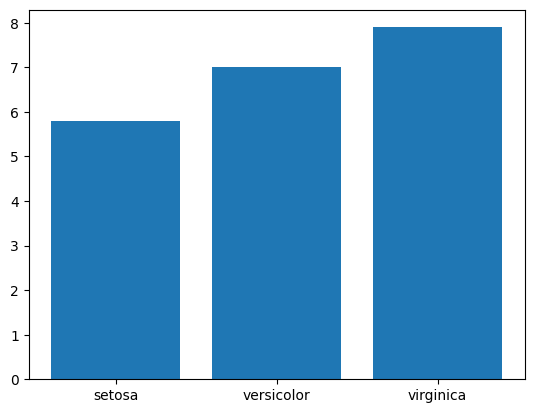

In [20]:
#꽃받침 길이의 시각화

import matplotlib.pyplot as plt

plt.bar(df2['species'],df2['sepal_length'])
plt.show()

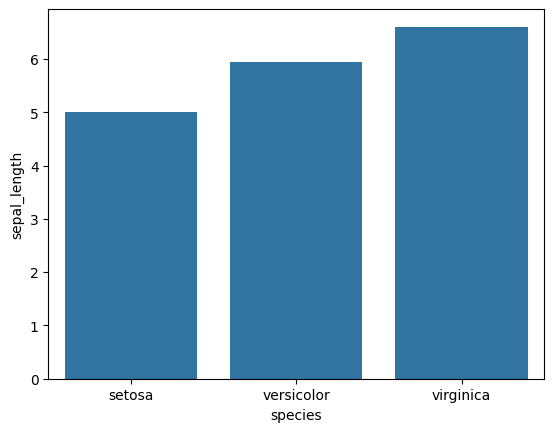

In [50]:
#붓꽃 종류별 꽃받침 길이의 평균에 대한 시각화

import seaborn as sns

sepalmean=df2.groupby('species')['sepal_length'].mean().reset_index()


sns.barplot(x='species',y='sepal_length',data=sepalmean)
plt.show()

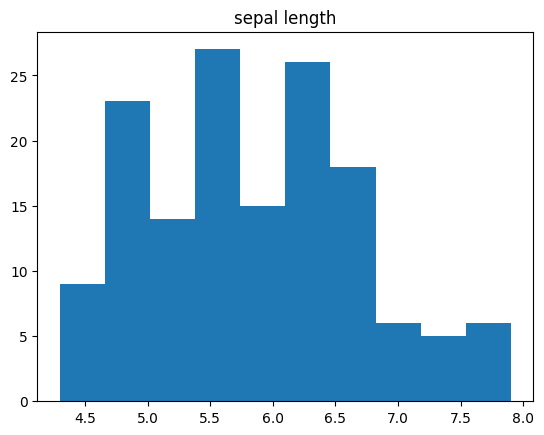

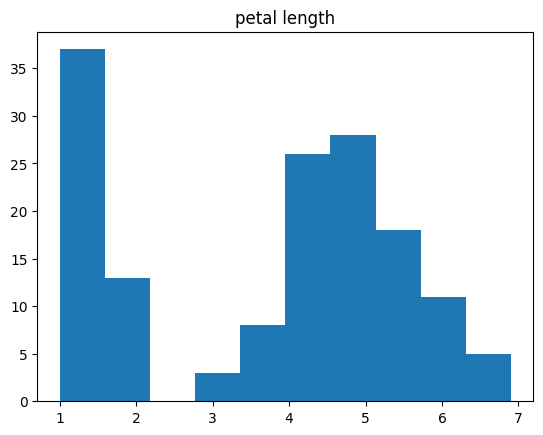

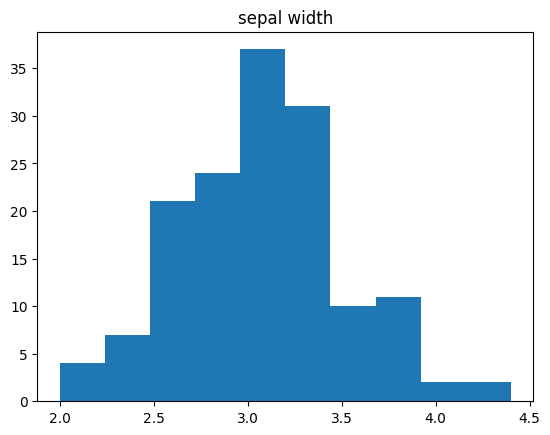

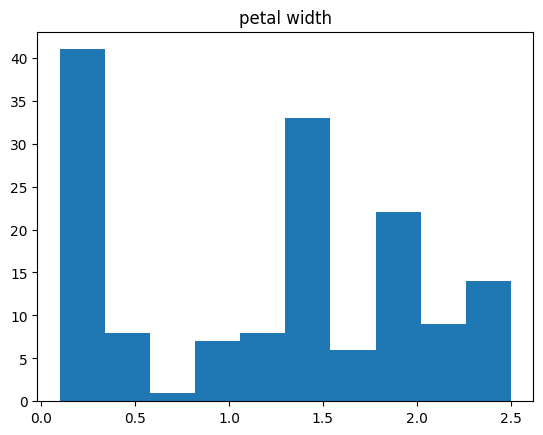

In [28]:
#각 특징(4가지) 값들의 빈도수에 대한 시각화

x=df2['sepal_length']
x2=df2['petal_length']
x3=df2['sepal_width']
x4=df2['petal_width']

plt.title('sepal length')
plt.hist(x)
plt.show()

plt.title('petal length')
plt.hist(x2)
plt.show()

plt.title('sepal width')
plt.hist(x3)
plt.show()

plt.title('petal width')
plt.hist(x4)
plt.show()

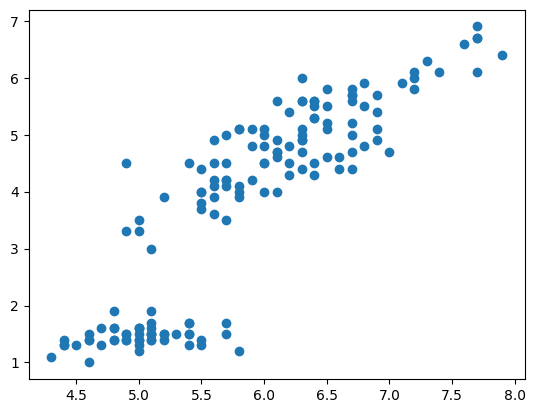

In [23]:
#꽃받침의 길이와 꽃잎의 길이의 산점도를 시각화

plt.scatter(df2['sepal_length'],df2['petal_length'])
plt.show()